In [147]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import sqlite3
import seaborn as sns

sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

%matplotlib inline

In [148]:
def get_dataframes(query, databases):
    dataframes = []
    for database in databases:
        db = sqlite3.connect(database)
        dataframes += [pd.read_sql_query(query, db)]
    return pd.concat(dataframes)

In [149]:
query = 'select executor, returned, start_submit, tag from tasks where tag != "noop"'
databases = [
             'xtract-data.db', 'crystallography-data.db', 'mnist-data.db'
]
tasks = get_dataframes(query, databases)

In [150]:
tasks['completion_time'] = (tasks['returned'] - tasks['start_submit']) * 1000
tasks.head()
tasks['batch_size'] = tasks.tag.str.extract('(\d+)')
tasks['task_time'] = tasks.completion_time / tasks.batch_size.astype(int)

print(tasks)

# for index, row in tasks.iterrows():
#     print(row['completion_time'], row['tag'], row['batch_size'], row['task_time'])

       executor      returned  start_submit                  tag  \
0   funcx_local  1.553788e+09  1.553788e+09       run_20k_file_1   
1   funcx_local  1.553788e+09  1.553788e+09       run_20k_file_1   
2   funcx_local  1.553788e+09  1.553788e+09       run_20k_file_1   
3   funcx_local  1.553788e+09  1.553788e+09       run_20k_file_1   
4   funcx_local  1.553788e+09  1.553788e+09       run_20k_file_1   
5   funcx_local  1.553788e+09  1.553788e+09       run_20k_file_1   
6   funcx_local  1.553788e+09  1.553788e+09       run_20k_file_1   
7   funcx_local  1.553788e+09  1.553788e+09       run_20k_file_1   
8   funcx_local  1.553788e+09  1.553788e+09       run_20k_file_1   
9   funcx_local  1.553788e+09  1.553788e+09       run_20k_file_1   
10  funcx_local  1.553788e+09  1.553788e+09       run_20k_file_1   
11  funcx_local  1.553788e+09  1.553788e+09       run_20k_file_1   
12  funcx_local  1.553788e+09  1.553788e+09       run_20k_file_1   
13  funcx_local  1.553788e+09  1.553788e+09     

In [151]:
tags = tasks["tag"].unique()
tags

array(['run_20k_file_1', 'run_20k_file_2', 'bash_dials_1', 'bash_dials_5',
       'bash_dials_10', 'bash_dials_25', 'bash_dials_50',
       'bash_dials_100', 'run_mnist_predict_1'], dtype=object)

In [152]:
latency_df = tasks[['tag', 'completion_time']]
latency_df["log_completion_time"] = np.log(latency_df["completion_time"]) / np.log(100)

for index, row in latency_df.iterrows():
    print(index, row['log_completion_time'], row['tag'])

0 1.4209755455921307 run_20k_file_1
1 1.4221745489142412 run_20k_file_1
2 1.4463690365352062 run_20k_file_1
3 1.4258517641488746 run_20k_file_1
4 1.418431576729853 run_20k_file_1
5 1.4240264497272221 run_20k_file_1
6 1.4215764319964481 run_20k_file_1
7 1.4164403963353256 run_20k_file_1
8 1.4206655626821771 run_20k_file_1
9 1.4199920369525414 run_20k_file_1
10 1.418452907000336 run_20k_file_1
11 1.4183494770933323 run_20k_file_1
12 1.419355448103237 run_20k_file_1
13 1.4264715056626143 run_20k_file_1
14 1.4208628757265978 run_20k_file_1
15 1.4189813487966763 run_20k_file_1
16 1.4189207411583347 run_20k_file_1
17 1.4196298283275728 run_20k_file_1
18 1.4178191911223093 run_20k_file_1
19 1.419059376897507 run_20k_file_1
20 1.4195643776047504 run_20k_file_1
21 1.4217879123532602 run_20k_file_1
22 1.4240448870048636 run_20k_file_1
23 1.4177716407169292 run_20k_file_1
24 1.4206008712042555 run_20k_file_1
25 1.4172487315411162 run_20k_file_1
26 1.4361124296206957 run_20k_file_1
27 1.4177512263

/home/skluzacek/anaconda3/envs/funcx/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/home/skluzacek/anaconda3/envs/funcx/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'log_completion_time (ms, base_20)')]

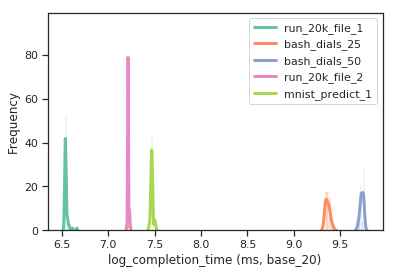

In [162]:
# print(latency_df)

latency_df["log_completion_time"] = np.log(latency_df["completion_time"])

file_20k_1 = latency_df.loc[(latency_df.tag == "run_20k_file_1")]
file_20k_1 = file_20k_1["log_completion_time"]

file_20k_2 = latency_df.loc[(latency_df.tag == "run_20k_file_2")]
file_20k_2 = file_20k_2["log_completion_time"]

bash_dials_25 = latency_df.loc[(latency_df.tag == "bash_dials_25")]
bash_dials_25 = bash_dials_25["log_completion_time"]

bash_dials_50 = latency_df.loc[(latency_df.tag == "bash_dials_50")]
bash_dials_50 = bash_dials_50["log_completion_time"]

mnist_predict_1 = latency_df.loc[(latency_df.tag == "run_mnist_predict_1")]
mnist_predict_1 = mnist_predict_1["log_completion_time"]

ax1 = sns.distplot(file_20k_1, kde_kws={"lw": 3, "label": "run_20k_file_1"})
ax2 = sns.distplot(bash_dials_25, kde_kws={"lw": 3, "label": "bash_dials_25"})
ax3 = sns.distplot(bash_dials_50, kde_kws={"lw": 3, "label": "bash_dials_50"})
ax4 = sns.distplot(file_20k_2, kde_kws={"lw": 3, "label": "run_20k_file_2"})
ax5 = sns.distplot(mnist_predict_1, kde_kws={"lw": 3, "label": "mnist_predict_1"})
ax1.set(xlabel = "log_completion_time (ms, base_20)", ylabel="Frequency")

# run_mnist_predict_1

In [161]:
bash_dials_25 = latency_df.loc[(latency_df.tag == "bash_dials_25")]
bash_dials_50 = latency_df.loc[(latency_df.tag == "bash_dials_50")]

print(np.mean(bash_dials_25["completion_time"]))

print(np.mean(bash_dials_50["completion_time"]))


11678.454240163168
16886.69548034668
